In [1]:
import sklearn
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
import pandas as pd
import spacy
import numpy as np
nlp = spacy.load("en_core_web_lg")
import re
from ast import literal_eval

In [2]:
## cleaning, data features, plot vector generation

In [14]:
df = pd.read_csv("imdb_df.csv",index_col=0,converters={'imdb_id': lambda x: str(x)})

In [15]:
df.head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,...,metacritic,boxoffice,production,release_date,type,writer,director,genres,actors,inflation_adj_gross
9,0017136,Metropolis,Not Rated,153 min,"Sometime in the future, the city of Metropolis...",German,Germany,6 wins & 5 nominations.,8.3,141814,...,98,529603.0,Paramount Pictures,1927-03-13,movie,"Thea von Harbou (screenplay), Thea von Harbou ...",Fritz Lang,"['Drama', ' Sci-Fi']","['Alfred Abel', ' Gustav Fröhlich', ' Rudolf K...",7.705632e+06
44,0032138,The Wizard of Oz,PG,102 min,In this charming film based on the popular L. ...,English,USA,Won 2 Oscars. Another 7 wins & 14 nominations.,8.0,349731,...,100,3840702.0,Warner Bros. Pictures,1939-08-25,movie,"Noel Langley (screenplay), Florence Ryerson (s...","Victor Fleming, George Cukor, Mervyn LeRoy, No...","['Adventure', ' Family', ' Fantasy', ' Musical']","['Judy Garland', ' Frank Morgan', ' Ray Bolger...",7.005440e+07
64,0035423,Kate & Leopold,PG-13,118 min,Kate and her actor brother live in N.Y. in the...,"English, French",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,...,44,47095453.0,Miramax Films,2001-12-25,movie,"Steven Rogers (story), James Mangold (screenpl...",James Mangold,"['Comedy', ' Fantasy', ' Romance']","['Meg Ryan', ' Hugh Jackman', ' Liev Schreiber...",4.390552e+08
141,0047034,Godzilla,Not Rated,96 min,Japan is thrown into a panic after several shi...,Japanese,Japan,2 wins & 2 nominations.,7.6,24513,...,78,2340.0,Rialto Pictures,2004-05-07,movie,"Takeo Murata, Ishirô Honda, Shigeru Kayama (st...",Ishirô Honda,"['Drama', ' Horror', ' Sci-Fi', ' Thriller']","['Akira Takarada', ' Momoko Kôchi', ' Akihiko ...",2.059462e+04
151,0048021,Rififi,Not Rated,118 min,"After five years in prison, Tony le Stéphanois...","French, Italian, English",France,6 wins & 1 nomination.,8.2,22694,...,97,57226.0,Rialto Pictures,1956-06-05,movie,"Auguste Le Breton (novel), Jules Dassin (adapt...",Jules Dassin,"['Crime', ' Thriller']","['Jean Servais', ' Carl Möhner', ' Robert Manu...",4.661641e+05


In [16]:
def make_docs(x):
    lemmatizer = WordNetLemmatizer()
    stops =  set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    doc = tokenizer.tokenize(x)
    l = []
    for i in doc:
        if i not in stops:
            l.append(i.lower())
        else:
            pass
    lemms = []
    for i in l:
        lemms.append(lemmatizer.lemmatize(i))
    return nlp(' '.join(lemms)).vector

In [17]:
def get_lemms(x):
    lemmatizer = WordNetLemmatizer()
    stops =  set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    doc = tokenizer.tokenize(x)
    l = []
    for i in doc:
        if i not in stops:
            l.append(i.lower())
        else:
            pass
    lemms = []
    for i in l:
        lemms.append(lemmatizer.lemmatize(i))
    return ' '.join(lemms)

In [18]:
df['actors'] = df['actors'].apply(lambda x: literal_eval(x))
df['actors'] = df['actors'].apply(lambda x: [i.strip(" ").rstrip(" ") for i in x])
df['release_date'] = pd.to_datetime(df['release_date'],infer_datetime_format=True)
df = df[df['release_date'] > '2000-01-01']
df['language'] = df['language'].apply(lambda x: x.replace(' ','').split(','))
df['writer'].fillna('N/A',inplace=True)
df['writer'] = df['writer'].apply(lambda x:re.sub(r'\([^)]*\)', '', x).split(','))
df['runtime'] = df['runtime'].apply(lambda x: int(x.replace(' min','')))
df['plot_vector'] = df['plot'].apply(lambda x: make_docs(x))
df['lemms'] = df['plot'].apply(lambda x: get_lemms(x))
df['day_of_week'] = df['release_date'].apply(lambda x: x.isoweekday())
df['is_christmas'] = df['release_date'].apply(lambda x: x.month == 12 and x.day == 25)
df['is_july_4'] = df['release_date'].apply(lambda x: x.month == 7 and x.day == 4)
df['is_summer'] = df['release_date'].apply(lambda x: x.month == 6 or x.month == 7 or x.month == 8)
df['month'] = df['release_date'].apply(lambda x: str(x).split("-")[1])
df['year'] = df['release_date'].apply(lambda x: str(x).split("-")[0])
df['awards'].fillna('N/A',inplace=True)
df['rated'].fillna('N/A',inplace=True)
df['production'].fillna('N/A',inplace=True)

In [19]:
df.head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,...,actors,inflation_adj_gross,plot_vector,lemms,day_of_week,is_christmas,is_july_4,is_summer,month,year
64,0035423,Kate & Leopold,PG-13,118,Kate and her actor brother live in N.Y. in the...,"[English, French]",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,...,"[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...",4.390552e+08,"[0.006614681, 0.15145023, -0.15877861, -0.0326...",kate actor brother live n y 21st century her e...,2,True,False,False,12,2001
141,0047034,Godzilla,Not Rated,96,Japan is thrown into a panic after several shi...,[Japanese],Japan,2 wins & 2 nominations.,7.6,24513,...,"[Akira Takarada, Momoko Kôchi, Akihiko Hirata,...",2.059462e+04,"[0.03099615, -0.0025545142, -0.08275967, 0.020...",japan thrown panic several ship explode sunk a...,5,False,False,False,05,2004
1036,0102587,Only Yesterday,PG,118,A twenty-seven-year-old office worker travels ...,"[Japanese, Hungarian]",Japan,1 win & 8 nominations.,7.7,19460,...,"[Miki Imai, Toshirô Yanagiba, Yoko Honna, Mayu...",7.316341e+05,"[0.23558174, -0.027313506, -0.029807588, -0.06...",a twenty seven year old office worker travel c...,5,False,False,False,02,2016
1513,0120630,Chicken Run,G,84,Having been hopelessly repressed and facing ev...,[English],"UK, USA, France",Nominated for 1 Golden Globe. Another 23 wins ...,7.0,163209,...,"[Phil Daniels, Lynn Ferguson, Mel Gibson, Tony...",1.567382e+08,"[-0.08427894, 0.05489412, -0.09587946, 0.09280...",having hopelessly repressed facing eventual ce...,5,False,False,True,06,2000
1522,0120667,Fantastic Four,PG-13,106,"Reed Richards, a brilliant but timid and bankr...",[English],"USA, Germany",3 wins & 12 nominations.,5.7,296153,...,"[Ioan Gruffudd, Jessica Alba, Chris Evans, Mic...",2.271377e+08,"[-0.06895232, 0.09732002, -0.047744736, 0.0119...",reed richards brilliant timid bankrupt scienti...,5,False,False,True,07,2005


### Original Plot

In [20]:
df['plot'][1534]

'An ancient Ring thought lost for centuries has been found, and through a strange twist in fate has been given to a small Hobbit named Frodo. When Gandalf discovers the Ring is in fact the One Ring of the Dark Lord Sauron, Frodo must make an epic quest to the Cracks of Doom in order to destroy it! However he does not go alone. He is joined by Gandalf, Legolas the elf, Gimli the Dwarf, Aragorn, Boromir and his three Hobbit friends Merry, Pippin and Samwise. Through mountains, snow, darkness, forests, rivers and plains, facing evil and danger at every corner the Fellowship of the Ring must go. Their quest to destroy the One Ring is the only hope for the end of the Dark Lords reign!'

### Lemmatized and Tokenized Text

In [21]:
df['lemms'][1534]

'an ancient ring thought lost century found strange twist fate given small hobbit named frodo when gandalf discovers ring fact one ring dark lord sauron frodo must make epic quest crack doom order destroy however go alone he joined gandalf legolas elf gimli dwarf aragorn boromir three hobbit friend merry pippin samwise through mountain snow darkness forest river plain facing evil danger every corner fellowship ring must go their quest destroy one ring hope end dark lord reign'

### Spacy Token Object

In [22]:
nlp(df['lemms'][1534].split(" ")[1])

ancient

In [23]:
type(nlp(df['lemms'][1534].split(" ")[1]))

spacy.tokens.doc.Doc

### Word Vector

In [24]:
nlp(df['lemms'][1534].split(" ")[1])

ancient

In [25]:
nlp(df['lemms'][1534].split(" ")[1]).vector

array([ 4.8821e-01, -3.7826e-01, -3.8929e-01, -1.3031e-01, -9.4594e-02,
        3.5006e-02, -2.2260e-01,  2.4313e-01, -7.6181e-01,  2.2576e+00,
        7.3351e-02, -4.3218e-01,  3.9362e-01,  2.8725e-01,  3.7492e-01,
        1.5622e-01,  2.1651e-02,  6.8744e-01, -2.2211e-02, -4.1803e-01,
        5.0924e-01,  3.8360e-02, -1.6014e-01,  7.2666e-01,  3.6170e-01,
       -2.0372e-01,  1.0351e-01,  3.0961e-01, -6.3458e-01,  8.3952e-01,
        3.4125e-01,  3.9778e-01,  1.5670e-01, -4.7494e-01,  2.7302e-01,
        6.7002e-01, -1.4672e-01, -1.7221e-01, -3.3185e-01,  1.8524e-01,
       -2.9022e-01,  1.5874e-02,  1.5382e-01,  3.0719e-02,  4.8696e-01,
       -1.8012e-01,  4.5550e-01,  2.1177e-02, -6.8134e-02,  3.5605e-02,
       -3.3532e-01, -2.6129e-01, -5.6060e-01,  8.8290e-02,  3.1039e-01,
        1.1614e-01,  8.4017e-04,  1.8825e-01,  4.6794e-02,  9.7379e-01,
       -2.8588e-01, -3.5402e-01, -1.3596e-02,  8.0087e-02, -3.2710e-01,
        2.5519e-01, -2.9317e-01,  2.5431e-01,  1.6212e-01,  3.81

### Plot Vector – Average of all word vectors in plot

In [26]:
nlp(df['lemms'][1534]).vector

array([ 2.10376885e-02, -2.05765236e-02, -1.30609334e-01, -4.58898246e-02,
       -7.59321824e-03, -1.56935126e-01,  6.03294447e-02, -1.04749389e-03,
       -5.80165684e-02,  1.66675591e+00, -1.80993870e-01, -1.71353742e-01,
       -5.16183451e-02,  4.10997681e-02,  4.48594242e-03,  6.42299801e-02,
        1.20307334e-01,  4.86231536e-01, -3.68361436e-02, -4.11876179e-02,
        1.41473010e-01, -1.27970934e-01, -1.00684002e-01,  3.15984413e-02,
        4.00886452e-03, -3.62965763e-02, -1.40068635e-01, -7.80071989e-02,
       -1.45329898e-02,  1.15140058e-01, -1.91429883e-01,  1.34326294e-01,
       -1.48453265e-01,  7.76206851e-02,  5.88601595e-03, -7.61204809e-02,
       -5.76217938e-03, -4.75810133e-02, -1.10208534e-01,  3.90707664e-02,
        3.64083610e-02,  1.06731124e-01,  5.46444021e-02, -9.86565351e-02,
        1.96743920e-01, -4.58058529e-02, -8.91757458e-02, -6.28335029e-02,
       -1.18941501e-01,  5.27958618e-03,  1.00862861e-01,  1.48589611e-01,
        1.37392834e-01, -

In [27]:
from sklearn.decomposition import PCA

### Plot Summary and Box Office

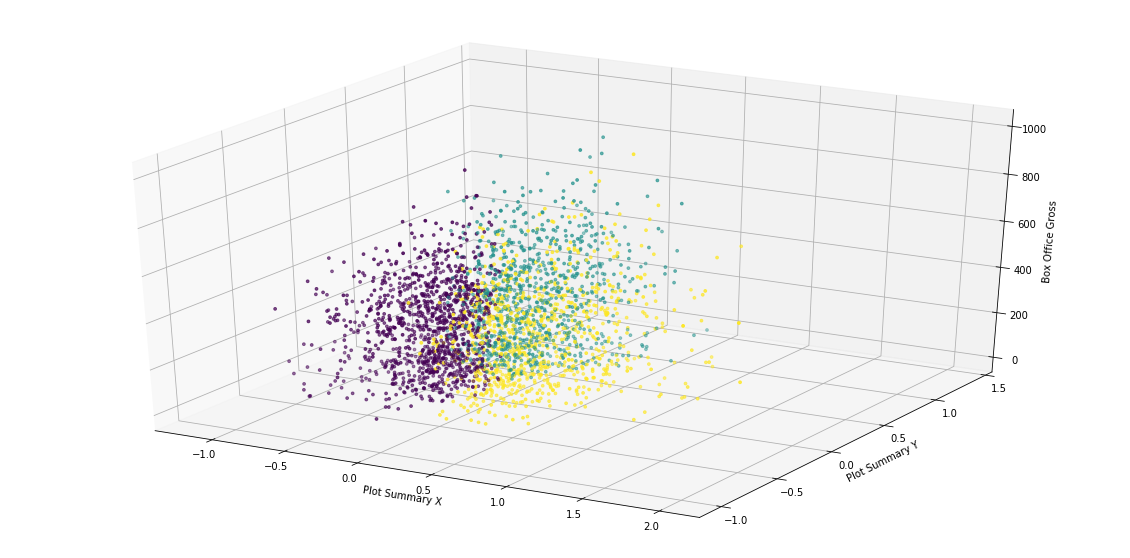

In [46]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,verbose=0).fit(np.vstack(df['plot_vector']))
X_s = PCA(n_components = 2).fit_transform(np.vstack(df['plot_vector']))
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('Plot Summary X')
plt.ylabel('Plot Summary Y')
ax.set_zlabel('Box Office Gross')
x = X_s[:,0]
y = X_s[:,1]
z = np.cbrt(df['inflation_adj_gross'].values.reshape(3009,1))

ax.scatter(x,y,z, marker=".", c=kmeans.labels_,s=30)

plt.show()

In [29]:
### Plot Summary Spatial Relationship

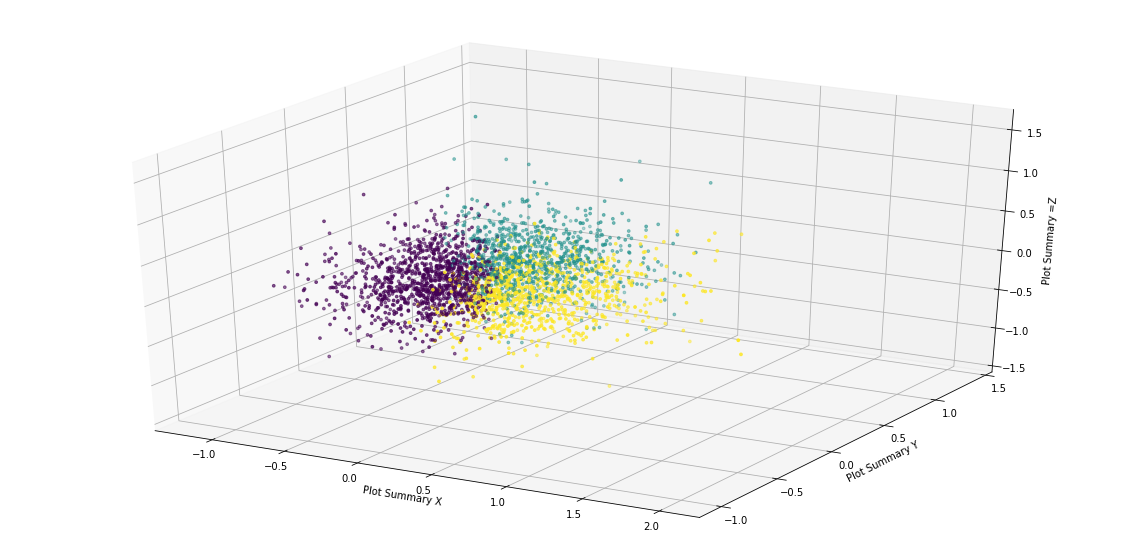

In [47]:

X_s = PCA(n_components = 3).fit_transform(np.vstack(df['plot_vector']))

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('Plot Summary X')
plt.ylabel('Plot Summary Y')
ax.set_zlabel('Plot Summary =Z')
x = X_s[:,0]
y = X_s[:,1]
z = X_s[:,2]

ax.scatter(x,y,z, marker=".", c=kmeans.labels_,s=30)

plt.show()

### Add additional categorical features

In [33]:
sequel_df = pd.read_csv("movies_with_sequels.csv",converters={'Const': lambda x: x.replace("tt","")})
df['is_franchise_film'] = df['imdb_id'].apply(lambda x: x in sequel_df['Const'].values)
books_df = pd.read_csv("movies_books.csv",converters={'Const': lambda x: x.replace("tt","")})
df['based_on_book'] = df['imdb_id'].apply(lambda x: x in books_df['Const'].values)
video_games_df = pd.read_csv("video_game_movies.csv",converters={'Const': lambda x: x.replace("tt","")})
df['video_game'] = df['imdb_id'].apply(lambda x: x in video_games_df['Const'].values)
comic_df = pd.read_csv("comic_book_movies.csv",converters={'Const': lambda x: x.replace("tt","")})
df['comic_book'] = df['imdb_id'].apply(lambda x: x in comic_df['Const'].values)
major_df = pd.read_csv("major_franchise.csv",converters={'Const': lambda x: x.replace("tt","")})
df['major_sequel'] = df['imdb_id'].apply(lambda x: x in major_df['Const'].values)

In [34]:
df.head()

,imdb_id,title,rated,runtime,plot,language,country,awards,imdb_ratings,imdb_votes,...,is_christmas,is_july_4,is_summer,month,year,is_franchise_film,based_on_book,video_game,comic_book,major_sequel
64,0035423,Kate & Leopold,PG-13,118,Kate and her actor brother live in N.Y. in the...,"[English, French]",USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,6.4,73934,...,True,False,False,12,2001,False,False,False,False,False
141,0047034,Godzilla,Not Rated,96,Japan is thrown into a panic after several shi...,[Japanese],Japan,2 wins & 2 nominations.,7.6,24513,...,False,False,False,05,2004,False,False,False,False,False
1036,0102587,Only Yesterday,PG,118,A twenty-seven-year-old office worker travels ...,"[Japanese, Hungarian]",Japan,1 win & 8 nominations.,7.7,19460,...,False,False,False,02,2016,False,False,False,False,False
1513,0120630,Chicken Run,G,84,Having been hopelessly repressed and facing ev...,[English],"UK, USA, France",Nominated for 1 Golden Globe. Another 23 wins ...,7.0,163209,...,False,False,True,06,2000,False,False,False,False,False
1522,0120667,Fantastic Four,PG-13,106,"Reed Richards, a brilliant but timid and bankr...",[English],"USA, Germany",3 wins & 12 nominations.,5.7,296153,...,False,False,True,07,2005,True,False,False,True,False


### Make Dummies for Categorical Variables

In [35]:
pca = PCA(n_components=10)
pca.fit(np.vstack(df['plot_vector'].values))
X = pca.transform(np.vstack(df['plot_vector'].values))

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [37]:
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres']),index=df.index)
country_dummies = pd.DataFrame(mlb.fit_transform(df['country']),index=df.index)
lang_dummies = pd.DataFrame(mlb.fit_transform(df['language']),index=df.index)
#rating_dummies = pd.get_dummies(df['rated'])
production_dummies = pd.get_dummies(df['production'])
director_dummies = pd.get_dummies(df['director'])
month_dummies = pd.get_dummies(df['month'])
year_dummies = pd.get_dummies(df['year'])
mlb = MultiLabelBinarizer()
sva = TruncatedSVD(n_components=20)
actor_dummies = pd.DataFrame(sva.fit_transform(mlb.fit_transform(df['actors'])),index=df.index)
writer_dummies = pd.DataFrame(sva.fit_transform(mlb.fit_transform(df['writer'])),index=df.index)

In [38]:
dummy_df = pd.concat([production_dummies,lang_dummies,director_dummies,country_dummies],
                     sort=True,axis=1)
dummy_pca = PCA(n_components=125)
dummy_df_pca = dummy_pca.fit_transform(dummy_df)
standardscale= pd.DataFrame(StandardScaler().fit_transform(pd.concat([pd.DataFrame(dummy_df_pca,index=df.index),
                                                                      df['runtime']],axis=1)),index=df.index)
predict_df = pd.concat([pd.DataFrame(standardscale,index=df.index),pd.DataFrame(X,index=df.index),
                        df['title'],actor_dummies,month_dummies,year_dummies,df['day_of_week'],df['is_franchise_film'],
                        df['based_on_book'],df['video_game'],df['comic_book'],genre_dummies,writer_dummies],axis=1)

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Add budget dataframe

In [39]:
budget_df = pd.read_csv("budget.csv")
budget_df['title'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
budget_df.index = budget_df.title
budget_df = budget_df.drop(columns=['release_date','title','Unnamed: 0','num'])
budget_df.head()
combined_df= predict_df.join(budget_df,on="title",how="left")
predict_df.drop(columns=['title'],inplace=True)
predict_df.columns = range(249)
combined_df.dropna(inplace=True)
prod_budget_targ = combined_df['production_budget']
combined_df.drop(columns=['title','dom_gross','production_budget','ww_gross'],inplace=True)
combined_df.columns = range(249)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
141,0.068343,2.363941,0.956326,-2.336066,-1.114145,-1.341208,1.896973,-2.107987,-2.755683,-0.829243,...,0.000927,-0.001475,-0.001221,-0.001973,-0.001860,-0.000637,-0.000587,-0.004647,-0.001352,0.002497
141,0.068343,2.363941,0.956326,-2.336066,-1.114145,-1.341208,1.896973,-2.107987,-2.755683,-0.829243,...,0.000927,-0.001475,-0.001221,-0.001973,-0.001860,-0.000637,-0.000587,-0.004647,-0.001352,0.002497
1513,1.141150,-0.364218,-1.111129,-0.864599,2.050772,1.914467,-1.160965,-1.512064,-0.361947,0.664983,...,-0.007438,0.169567,0.017322,-0.024454,0.000607,0.043818,-0.013014,0.117913,-0.001803,-0.055387
1522,1.162978,-0.724953,-2.570146,0.772227,-1.047235,-1.206956,0.095366,-0.725078,-0.781521,-0.251029,...,-0.008960,-0.008697,0.029361,-0.073472,-0.199839,-0.022542,0.010982,-0.012256,0.030112,-0.018901
1522,1.162978,-0.724953,-2.570146,0.772227,-1.047235,-1.206956,0.095366,-0.725078,-0.781521,-0.251029,...,-0.008960,-0.008697,0.029361,-0.073472,-0.199839,-0.022542,0.010982,-0.012256,0.030112,-0.018901


### Make budget predictions

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
import xgboost as xgb

In [42]:
X_train,X_test,y_train,y_test = train_test_split(combined_df,np.cbrt(prod_budget_targ))

In [43]:
x_r_pb = xgb.XGBRegressor(base_score=.5,booster='dart',max_depth=3,n_estimators=60000,n_jobs=16,min_samples_leaf=1
                       ,eta=1,reg_lambda=30,subsample=.7,colsample_bytree=.8,min_child_weight=30,random_state=0,
                      warm_start=True)

In [44]:
eval_set = [(X_test, y_test)]

In [35]:
x_r_pb.fit(combined_df,np.cbrt(prod_budget_targ),early_stopping_rounds=50,eval_metric="rmse", eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=0.8, eta=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=30,
       min_samples_leaf=1, missing=None, n_estimators=60000, n_jobs=16,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=30, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7, warm_start=True)

In [36]:
x_r_pb.predict(predict_df)

array([359.16687, 521.4145 , 255.44164, ..., 308.6829 , 351.04657,
       150.47319], dtype=float32)

### Interaction Terms

In [37]:
interaction_pca = PCA(n_components = 1)
X_interact = interaction_pca.fit_transform(np.vstack(df['plot_vector'].values))
genre_interact = interaction_pca.fit_transform(genre_dummies)
actor_interact = np.multiply(interaction_pca.fit_transform(actor_dummies),X)
actor_runtime = np.multiply(df['runtime'].values.reshape(3009,1),actor_dummies)
actor_month =  pd.DataFrame(np.multiply(actor_dummies,interaction_pca.fit_transform(month_dummies)),index=df.index)
actor_budget = pd.DataFrame(np.multiply(actor_dummies,x_r_pb.predict(predict_df).reshape(3009,1)),index=df.index)
actor_year = pd.DataFrame(np.multiply(actor_dummies,interaction_pca.fit_transform(year_dummies)),index=df.index)
genre_budget =  pd.DataFrame(np.multiply(x_r_pb.predict(predict_df).reshape(3009,1),genre_dummies),index=df.index)
plot_budget =  pd.DataFrame(np.multiply(X,x_r_pb.predict(predict_df).reshape(3009,1)),index=df.index)
plot_runtime = pd.DataFrame(np.multiply(X,df['runtime'].values.reshape(3009,1)),index=df.index)
plot_runtime_budget = pd.DataFrame(np.multiply(plot_runtime,x_r_pb.predict(predict_df).reshape(3009,1)),index=df.index)
plot_franchise = pd.DataFrame(np.multiply(X,df['is_franchise_film'].values.reshape(3009,1)),index=df.index)
major_franchise = pd.DataFrame(np.multiply(X,df['major_sequel'].values.reshape(3009,1)),index=df.index)
writer_genre = pd.DataFrame(np.multiply(genre_dummies,interaction_pca.fit_transform(writer_dummies)),index=df.index)
writer_budget =  pd.DataFrame(np.multiply(x_r_pb.predict(predict_df).reshape(3009,1),writer_dummies),index=df.index)

### XGBoost regression

In [70]:
reg_predict_df = pd.concat([predict_df,pd.DataFrame(x_r_pb.predict(predict_df),index=df.index),pd.DataFrame(actor_interact,index=df.index),
                           actor_budget,plot_franchise,writer_genre,writer_budget],axis=1)
#reg_predict_df.drop(columns=['title'],inplace=True)
reg_predict_df.columns = range(347)

In [72]:
reg_predict_df.columns = range(347)

In [176]:
X_train,X_test,y_train,y_test = train_test_split(reg_predict_df.values,np.cbrt(df['inflation_adj_gross'].values),random_state=0)

In [177]:
x_r = xgb.XGBRegressor(base_score=.5,booster='dart',max_depth=4,n_estimators=300000,n_jobs=16,min_samples_leaf=1
                       ,learning_rate=.1,reg_lambda=120,subsample=.85,colsample_bytree=.45,min_child_weight=45,random_state=0)

In [178]:
eval_set = [(X_test, y_test)]

In [179]:
from sklearn.metrics import explained_variance_score

In [180]:
x_r.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="rmse", eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=0.45, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=45, min_samples_leaf=1, missing=None,
       n_estimators=300000, n_jobs=16, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=120,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.85)

In [181]:
x_r.score(X_train,y_train)

0.8671327480064409

In [182]:
x_r.score(X_test,y_test)

0.7056971806408276

In [183]:
explained_variance_score(y_test, x_r.predict(X_test))

0.7056982486924706

In [184]:
## mean absolute error
sklearn.metrics.mean_absolute_error(y_test,x_r.predict(X_test))

79.66359952907456

In [185]:
np.mean(y_test)

285.5248508632402

In [186]:
## median absolute error
np.median(abs(y_test-x_r.predict(X_test)))

64.75509245420994

In [187]:
np.median(y_test)

276.4256116316645

In [188]:
## Predicted vs. Actuals

In [190]:
import seaborn as sns

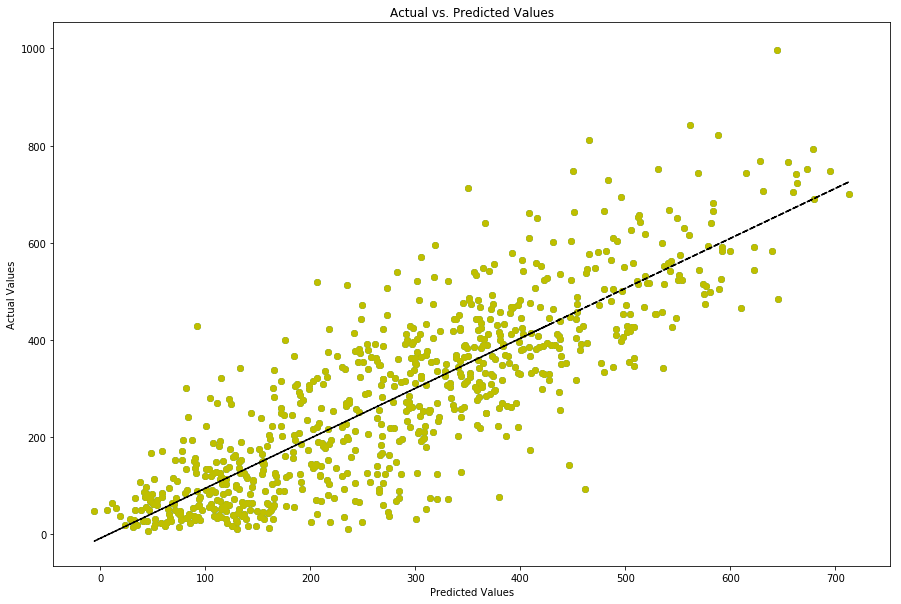

In [191]:
fig = plt.figure(figsize = (15,10))
x= x_r.predict(X_test)
y= y_test
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.scatter(x_r.predict(X_test),y_test)

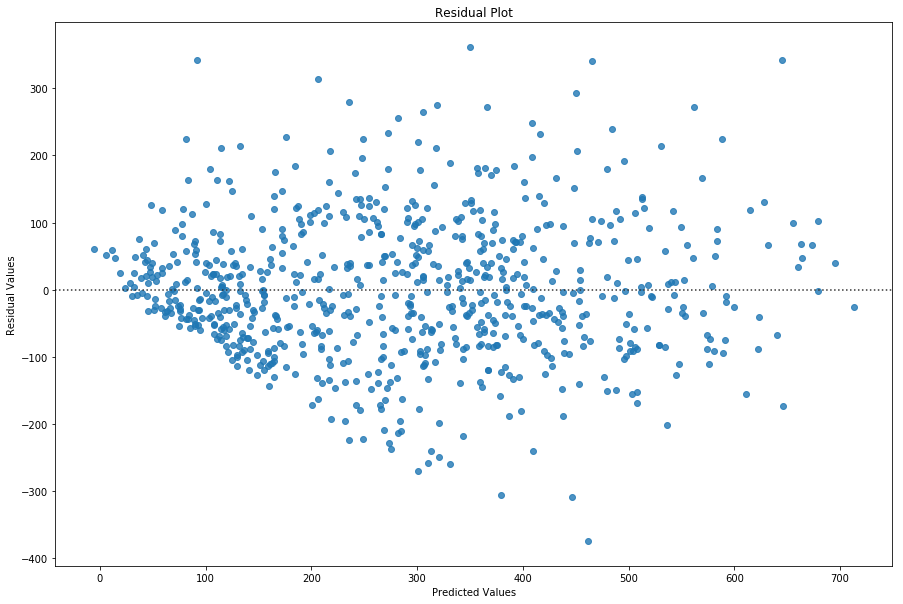

In [192]:
plt.figure(figsize = (15,10))
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
sns.residplot(x_r.predict(X_test),y_test)

In [193]:
plot_pca = PCA(n_components = 10)
plot_5 = plot_pca.fit_transform(np.vstack(df['plot_vector'].values))
corr_map = pd.DataFrame(df['inflation_adj_gross'])
corr_map['actor'] = interaction_pca.fit_transform(mlb.fit_transform(df['actors']))
corr_map['genre'] = interaction_pca.fit_transform(genre_dummies)
corr_map['plot_1'] = plot_5[:,0]
corr_map['plot_2'] = plot_5[:,1]
corr_map['plot_3'] = plot_5[:,2]
corr_map['plot_4'] = plot_5[:,3]
corr_map['plot_5'] = plot_5[:,4]
corr_map['plot_6'] = plot_5[:,5]
corr_map['plot_7'] = plot_5[:,6]
corr_map['plot_8'] = plot_5[:,7]
corr_map['plot_9'] = plot_5[:,8]
corr_map['plot_10'] = plot_5[:,9]
corr_map['country'] = interaction_pca.fit_transform(country_dummies)
corr_map['writer'] = interaction_pca.fit_transform(writer_dummies)
corr_map['lang'] = interaction_pca.fit_transform(lang_dummies)
corr_map['production'] = interaction_pca.fit_transform(production_dummies)
corr_map['director'] = interaction_pca.fit_transform(director_dummies)
corr_map['month'] = interaction_pca.fit_transform(month_dummies)
corr_map['year'] = interaction_pca.fit_transform(year_dummies)
corr_map['day'] =  df['day_of_week']
corr_map['franchise'] = df['is_franchise_film']
corr_map['book'] = df['based_on_book']
corr_map['video_game'] = df['video_game']
corr_map['comic_book'] = df['comic_book']
corr_map['runtime'] = df['runtime']
corr_map['prod_budget_prediction'] = x_r_pb.predict(predict_df)
corr_map['actor_plot_int'] = interaction_pca.fit_transform(actor_interact)
corr_map['actor_runtime'] = interaction_pca.fit_transform(actor_runtime)
corr_map['actor_budget'] = interaction_pca.fit_transform(actor_budget)
corr_map['plot_franchise'] = interaction_pca.fit_transform(plot_franchise)
corr_map['writer_genre'] = interaction_pca.fit_transform(writer_genre)

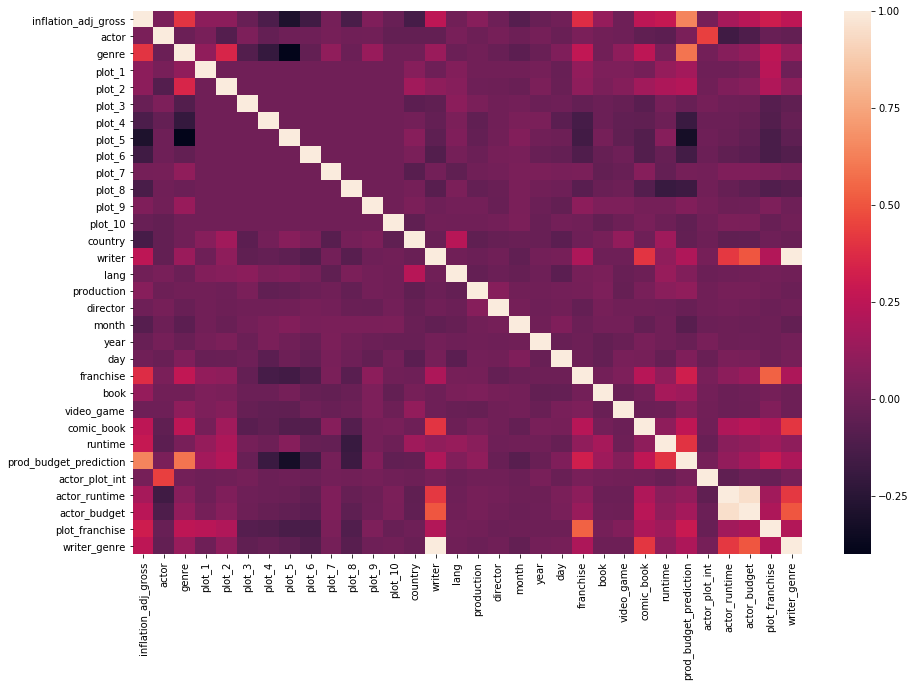

In [194]:
corr = corr_map.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### LSTM Plot Summary

In [210]:
tokenizer = keras.preprocessing.text.Tokenizer(nb_words = 20000,lower = True)
tokenizer.fit_on_texts(df['plot'].values)
word_seq = tokenizer.texts_to_sequences(df['plot'].values)
padded_seq = keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(df['plot'].values))

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/text.py:177: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [211]:
embed_dim = 600
lstm_out = 50
batch_size = 32

In [212]:
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout

In [213]:
model = Sequential()
model.add(Embedding(20000, embed_dim,input_length = padded_seq.shape[1]))
model.add(LSTM(lstm_out, dropout_U = 0.4, dropout_W = 0.4,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.6))
model.add(Dense(100))
model.add(Dropout(0.4))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 477, 600)          12000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 477, 50)           130200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 707       
Total para

In [214]:
lstm_X_train,lstm_X_test,lstm_y_train,lstm_y_test = train_test_split(padded_seq,y_binary,random_state=0)

In [ ]:
model.fit(lstm_X_train,lstm_y_train, batch_size=3, epochs=100,validation_data=(lstm_X_test, lstm_y_test))

In [ ]:
model.predict(padded_seq)[0]